<a href="https://colab.research.google.com/github/mjmanishjoshi/tfnotebooks/blob/master/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

## Analyze your Data Set
In the fashion MNIST example our data set includes 70,000 images (28x28 each) belonging to one of 10 categories. Our objective is to create a model that can classify a given image to one of the 10 categories.

Lets start with the boilerplate - 

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np

Load the fashion MNIST data set -

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Analyze the training and test data set -

In [0]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Let's explore the training images

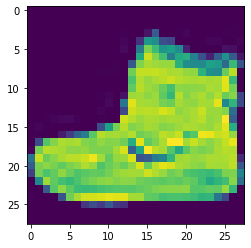

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.show()

Preprocess images from range (0-255) to (0-1)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Let's explore the training images now

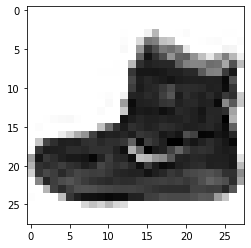

In [7]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

## Create Model
We'll create a sequential model with three layers -
* Formatting layer to flatten a 28x28 image to an array of 784 items
* A neural layer of 128 nodes, it gets activated only if the output is greater than 0.0
* A neural layer of 10 nodes (one per label), it gets activated only if the output is highest 



In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=keras.activations.relu),
                          keras.layers.Dense(10, activation=keras.activations.softmax)
])
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

Train the model -

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4965 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3759 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

Evaluate the model -

In [14]:
model.evaluate(train_images, train_labels)
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8843


[0.33491671085357666, 0.8842999935150146]